<a href="https://colab.research.google.com/github/Jeromy0515/machine-learning/blob/main/machine_learning3_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 데이터 프레임 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("sample_data/phone.xlsx")
df.head()

,DM1,KK1,Q3B_1,Q3B_2,Q3B_3,Q3B_4,Q3B_5,Q3B_6,Q3B_7,Q3B_8,Q3B_9,Q3B_10
0,2,2,2,3,3,3,2,2,2,3,3,2
1,2,3,2,2,1,2,2,3,2,2,2,2
2,2,3,1,1,1,1,1,1,1,2,2,2
3,2,3,2,3,3,2,2,1,2,2,2,2
4,2,3,1,1,1,1,1,1,1,4,1,1


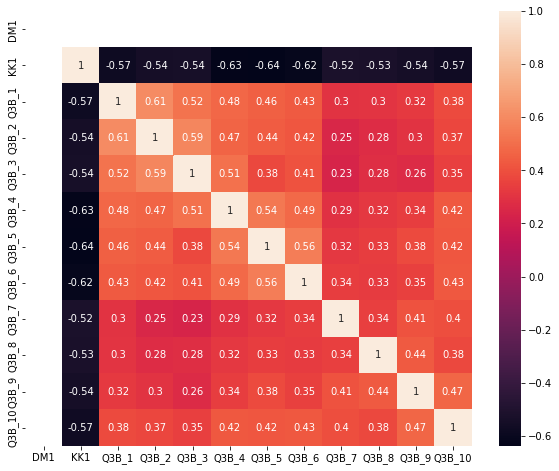

In [6]:
# 상관관계 분석
import seaborn as sns
df.corr() # corr() 상관 계수 반환
plt.figure(figsize=(10,8))  # figure() figure(그림) 생성, 가로 10인치, 세로 8인치
sns.heatmap(df.corr(), annot=True) # sns.headmap(): axes(좌표축) 레벨의 함수로써 현재 활성화된 axes(좌표축)에 대해 히트맵 생성
# annotaion: 히트맵 내부 수치

In [7]:
# X, y 정의
X = df[['Q3B_4','Q3B_5','Q3B_6','Q3B_10']].to_numpy() # 상관관계가 높은 4개 속성 선택
y = df['KK1'].to_numpy() # KK1 속성만
print(X.shape, y.shape) # X,y 형태 출력

(4886, 4) (4886,)


In [8]:
# data split
from sklearn.model_selection import train_test_split

# 비율은 default(75:25), 결과값 비종 동일하게(stratify 매개변수)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) # 훈련 세트와 테스트 세트 분리
print(X_train.shape, y_train.shape)

(3664, 4) (3664,)


In [9]:
# training
from sklearn.neural_network import MLPClassifier
# hidden_layer_sizes() 은닉층의 크기를 정의하는 함수로 은닉층의 수와 뉴런의 갯수를 튜플로 전달함
model = MLPClassifier(hidden_layer_sizes=(100,50,25), verbose=True) # verbose: 모델 학습 과정 출력 여부
model.fit(X_train, y_train)

Iteration 1, loss = 0.93088836
Iteration 2, loss = 0.77269882
Iteration 3, loss = 0.67749264
Iteration 4, loss = 0.57941794
Iteration 5, loss = 0.48225134
Iteration 6, loss = 0.40008884
Iteration 7, loss = 0.34741234
Iteration 8, loss = 0.32009992
Iteration 9, loss = 0.30669464
Iteration 10, loss = 0.29919480
Iteration 11, loss = 0.29486520
Iteration 12, loss = 0.28147626
Iteration 13, loss = 0.27784963
Iteration 14, loss = 0.27240308
Iteration 15, loss = 0.28531862
Iteration 16, loss = 0.26969936
Iteration 17, loss = 0.26913946
Iteration 18, loss = 0.26070025
Iteration 19, loss = 0.25879019
Iteration 20, loss = 0.25667874
Iteration 21, loss = 0.25691196
Iteration 22, loss = 0.26100566
Iteration 23, loss = 0.25472914
Iteration 24, loss = 0.25033190
Iteration 25, loss = 0.25140336
Iteration 26, loss = 0.24951699
Iteration 27, loss = 0.24639904
Iteration 28, loss = 0.24604568
Iteration 29, loss = 0.25613111
Iteration 30, loss = 0.25025829
Iteration 31, loss = 0.25262800
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50, 25), verbose=True)

In [10]:
# 모델 정확도
model.score(X_test, y_test)

0.897708674304419

In [11]:
# 스마트폰 과의존 유형 안내 프로그램 실습
question = ['스마트폰이 옆에 있으면 다른 일에 집중하기 어렵다.',
            '스마트폰 생각이 머리에서 떠나지 않는다.',
            '스마트폰을 이용하고 싶은 충동을 강하게 느낀다.',
            '스마트폰 때문에 학업 수행에 어려움이 있다.']

result = np.zeros(4)
print('다음 질문에 답해주세요. 1(전혀아니다),2(아니다), 3(그렇다), 4(매우 그렇다)')

다음 질문에 답해주세요. 1(전혀아니다),2(아니다), 3(그렇다), 4(매우 그렇다)


In [12]:
for i, q in enumerate(question): # enumerate(iterable): 인덱스와 원소로 이루어진 튜플 반환 (index, elements)
  result[i] = int(input((q)))
pred_result = model.predict([result]) # predict() 모델 예측 값 반환

if pred_result == 1:
  print("예상: 고위험군")
elif pred_result == 2:
  print("예상: 잠재적 위험군")
else:
  print("예상: 일반 사용자군")

스마트폰이 옆에 있으면 다른 일에 집중하기 어렵다.1
스마트폰 생각이 머리에서 떠나지 않는다.2
스마트폰을 이용하고 싶은 충동을 강하게 느낀다.3
스마트폰 때문에 학업 수행에 어려움이 있다.4
예상: 잠재적 위험군
